In [1]:
%matplotlib inline

In [2]:
import numpy as np

from scipy import linalg
from scipy import sparse


import sklearn.metrics.pairwise as knl
from sklearn import datasets
from sklearn.manifold import Isomap

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick
plt.rcParams['figure.figsize'] = [9,5] #globally set figure size
params = {'legend.fontsize': 'x-small',
         'axes.labelsize': 'x-small',
         'axes.titlesize':'x-small',
         'xtick.labelsize':8,
         'ytick.labelsize':8}
plt.rcParams.update(params)

from mpl_toolkits.mplot3d import Axes3D

import tadasets

from ripser import ripser
from persim import plot_diagrams

from PIL import Image

/home/ag16115/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## data load

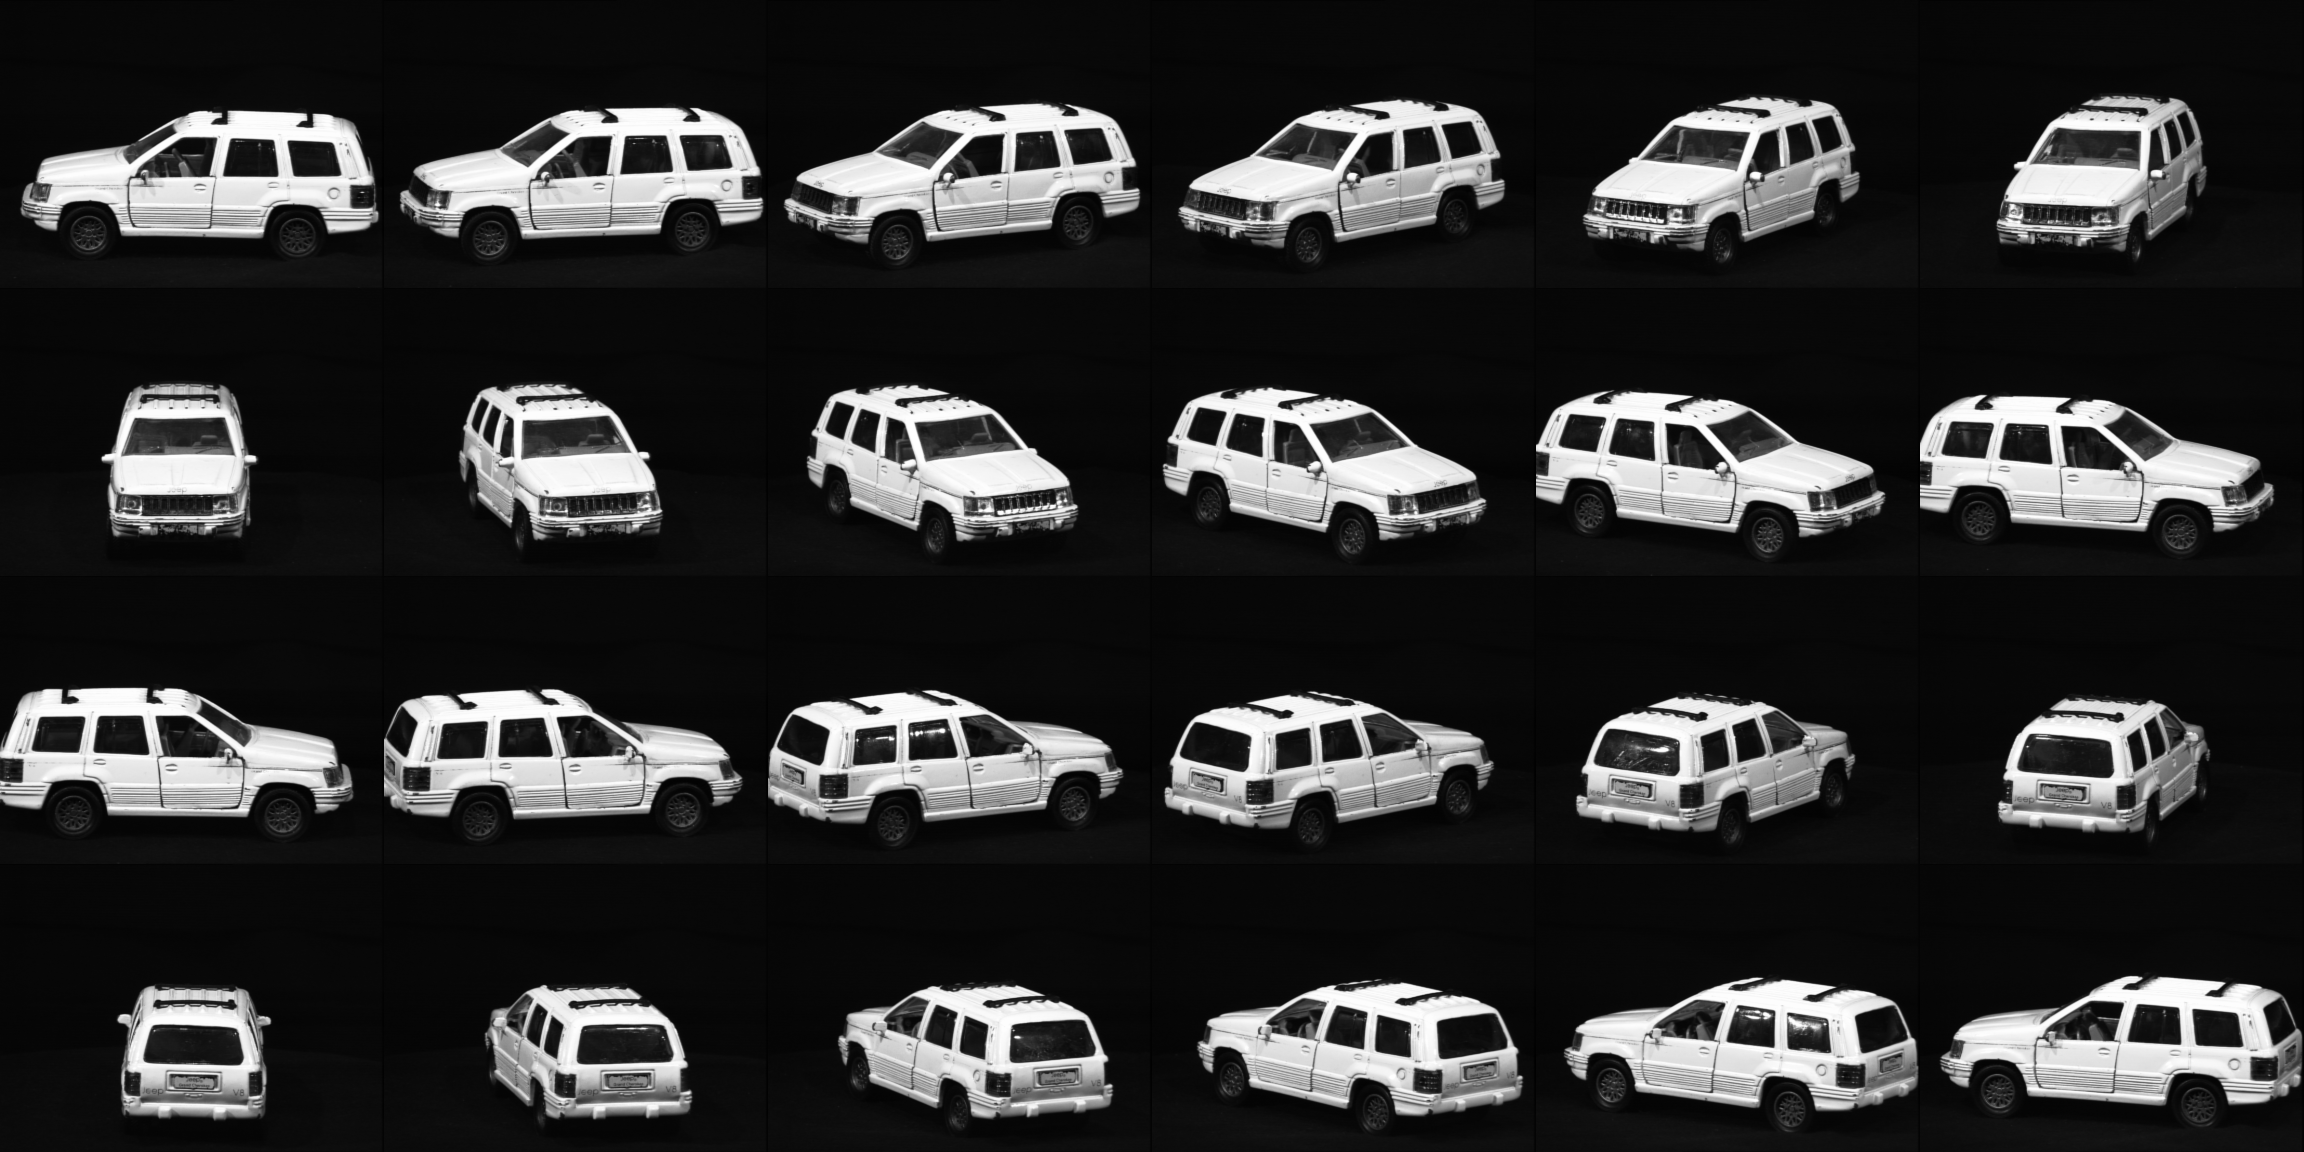

In [3]:
#plot a selection of the images - there are 72 in total

fs = []
#fetch 24 images, corresponding to equi-spaced camera locations
for i in range(0,360,15):
    im = Image.open('./car images/160_r%i.png'%i,'r')
    #im = Image.open('./watering_can_images/809_r%i.png'%i,'r')
    fs.append(im)
    
# get the image size
x_im,y_im = fs[0].size

ncol = 6
nrow = 4
cvs = Image.new('RGB',(x_im*ncol,y_im*nrow))

for i in range(len(fs)):
    px, py = x_im*(i%ncol), y_im*int(i/ncol)
    cvs.paste(fs[i],(px,py))
    
cvs

In [4]:
# cvs.save('cars_combined.png',format='png')

In [5]:
## get the car data
X = np.genfromtxt('car_pixels.csv',delimiter=',',skip_header=1)

X = np.asmatrix(X)
m = X.mean(axis=0)
X = X - m

color = np.arange(0,360,5)

In [6]:
n = np.shape(X)[1]
p = np.shape(X)[0]
r = 72
print(p)
print(n)

110592
72


In [7]:
U, s, Vh = sparse.linalg.svds(X,k=r-1)

idx = np.argsort(s)
idx = np.flip(idx)
U = U[:,idx]
s = s[idx]
Vh = Vh[idx,:]

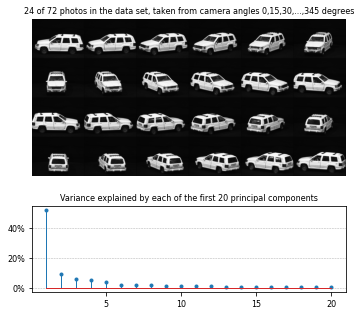

In [8]:
# image = plt.imread('cars_combined.png')
image = cvs

fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
fig.set_size_inches(5, 5)

ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('24 of 72 photos in the data set, taken from camera angles 0,15,30,...,345 degrees',fontsize = 8)

r_plot = 20
percent_var = s[0:r_plot]**2/sum(s**2)

markerline, stemline, baseline, = ax[1].stem(range(1,r_plot+1),100*percent_var)
#ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set_xticks([5,10,15,20])
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax[1].grid(axis='y', linestyle='--', linewidth=0.5)
ax[1].set_title('Variance explained by each of the first 20 principal components', fontsize = 8)

plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
plt.setp(baseline, linewidth = 1)

fig.subplots_adjust(hspace=-.2)
fig.tight_layout()


In [9]:
print(np.sum(100*percent_var[0:20]))

91.49314175788156


In [10]:
# plt.savefig('cars_and_var.png', bbox_inches='tight', pad_inches=0)

In [11]:
# plt.savefig('cars_and_var.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1200)

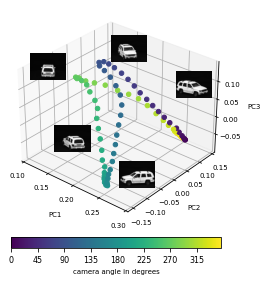

In [12]:
#NB factor of p^-1/2 included in zeta - see main consistency theorem 
zeta = np.diag(s[0:r]) @ Vh[0:r,:] /p**0.5 
zeta = zeta.T



fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
im = ax.scatter(zeta[:,0], zeta[:,1], zeta[:,2],  marker='o', c=color, cmap='viridis', alpha=1) #c=color,
ax.set_xlabel('PC1', labelpad=0.5)
ax.set_ylabel('PC2', labelpad=0.5)
ax.set_zlabel('PC3', labelpad=0.5)

elev = 30.0
azim =310.0
ax.view_init(elev, azim)
ax.set_xlim(0.1,0.3)
ax.set_xticks([0.1,0.15,0.2,0.25,0.3])
ax.tick_params(axis='x', pad=0.3, labelsize = 'x-small')
ax.tick_params(axis='y', pad=0.3, labelsize = 'x-small')
ax.tick_params(axis='z', pad=0.3, labelsize = 'x-small')


#each time the SVD is calculated it may return different signs of the singular vectors
#corresponding to some orthogonal transformation of the PC scores - so need to place below images accordingly


#arr_image = plt.imread('./car images/160_r0.png', format='png')
arr_image = plt.imread('./car images/160_r140.png', format='png')
newax = fig.add_axes([0.68, 0.6, 0.1, 0.1], anchor='NE')
newax.imshow(arr_image/255.0, cmap='gray')
newax.axis('off')

#arr_image = plt.imread('./car images/160_r45.png', format='png')
arr_image = plt.imread('./car images/160_r15.png', format='png')
newax = fig.add_axes([0.52, 0.35, 0.1, 0.1], anchor='NE')
newax.imshow(arr_image/255.0, cmap='gray')
newax.axis('off')

#arr_image = plt.imread('./car images/160_r90.png', format='png')
arr_image = plt.imread('./car images/160_r290.png', format='png')
newax = fig.add_axes([0.34, 0.45, 0.1, 0.1], anchor='NE')
newax.imshow(arr_image/255.0, cmap='gray')
newax.axis('off')

#arr_image = plt.imread('./car images/160_r180.png', format='png')
arr_image = plt.imread('./car images/160_r105.png', format='png')
newax = fig.add_axes([0.5, 0.7, 0.1, 0.1], anchor='NE')
newax.imshow(arr_image/255.0, cmap='gray')
newax.axis('off')

arr_image = plt.imread('./car images/160_r270.png', format='png')
newax = fig.add_axes([0.275, 0.65, 0.1, 0.1], anchor='NE')
newax.imshow(arr_image/255.0, cmap='gray')
newax.axis('off')


fig.colorbar(im, ax=ax, shrink=0.75, location='bottom', pad = 0.05, label='camera angle in degrees', ticks=[0,45,90,135,180,225,270,315,360])

In [13]:
# plt.savefig('cars_embedding_plus.png', bbox_inches='tight', pad_inches=0)

In [14]:
# plt.savefig('cars_embedding_plus.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1200)

In [15]:
# plt.savefig('cars_embedding_pc.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1200)